In [4]:
!pip install tslearn

In [249]:
import pandas as pd
df = pd.read_csv('C:/Users/Utente/OneDrive/Desktop/TS_X_train_reduced.csv')

In [106]:
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [107]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [108]:
import numpy as np


In [109]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw

In [87]:
from tqdm import tqdm

In [88]:
import scipy.cluster.hierarchy as hac


In [89]:
from tslearn.piecewise import SymbolicAggregateApproximation

In [90]:
from sklearn.cluster import KMeans

In [91]:
import scipy

In [92]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [250]:
df = df.drop("Unnamed: 0", axis=1)

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32422,32423,32424,32425,32426,32427,32428,32429,32430,32431
0,-6.522588e-09,-6.214034e-08,1.556426e-07,-2.865991e-07,4.943511e-07,-9.538162e-07,4.076188e-06,2.361484e-06,-1.497017e-06,3.360536e-06,...,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07,9.151642e-07
1,-4.039391e-06,-1.736967e-06,-2.901299e-06,-1.339160e-05,-9.244283e-06,7.533309e-07,-3.758562e-06,-3.376192e-06,-5.118569e-06,-2.873267e-06,...,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07,7.138665e-07
2,1.341647e-05,3.370885e-05,1.997766e-05,3.560372e-05,3.337293e-05,3.251601e-05,2.510529e-05,1.071143e-05,1.372787e-05,1.559984e-05,...,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07,9.559326e-07
3,1.871476e-05,2.440678e-06,1.827156e-05,4.535810e-05,1.165629e-05,4.577107e-06,-5.084016e-06,1.503660e-05,2.753088e-05,8.549392e-07,...,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07,9.178294e-07
4,4.674617e-06,4.046379e-07,-3.852603e-07,3.560568e-07,-3.189821e-07,2.765078e-07,-2.314388e-07,1.867016e-07,-1.451136e-07,1.091577e-07,...,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07,8.110458e-07


In [251]:
w = 3 
for i in range (df.shape[0]):
    df.iloc[i,:] = (df.iloc[i,:] - df.iloc[i,:].mean()/df.iloc[i,:]
                    .std()).rolling(window=w).mean()

In [252]:
df.dropna(inplace = True, axis=1)

In [247]:
df

,2,3,4,5,6,7,8,9,10,11,...,32422,32423,32424,32425,32426,32427,32428,32429,32430,32431
0,-0.000255,-0.000255,-0.000255,-0.000255,-0.000253,-0.000253,-0.000253,-0.000253,-0.000253,-0.000252,...,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254,-0.000254
1,-0.000188,-0.000191,-0.000193,-0.000192,-0.000189,-0.000187,-0.000189,-0.000188,-0.000189,-0.000191,...,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184,-0.000184
2,-0.000191,-0.000183,-0.000183,-0.000179,-0.000183,-0.000190,-0.000197,-0.000200,-0.000194,-0.000191,...,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212,-0.000212
3,-0.000203,-0.000194,-0.000191,-0.000196,-0.000213,-0.000212,-0.000204,-0.000202,-0.000207,-0.000216,...,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216,-0.000216
4,-0.000295,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,-0.000296,...,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295,-0.000295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,0.000188,...,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187,0.000187
1824,0.000100,0.000099,0.000100,0.000099,0.000100,0.000100,0.000099,0.000100,0.000098,0.000098,...,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099,0.000099
1825,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,...,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135,0.000135
1826,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,0.000041,...,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040,0.000040


In [255]:
# SAX transform -- 3 symbols
n_paa_segments = 600
n_sax_symbols = 14
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(df)
#ts_sax_inv = sax.inverse_transform(ts_sax)
ts_sax = ts_sax.squeeze()
df_sax = pd.DataFrame(ts_sax, index=df.index)

C:\Users\Utente\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1828 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


In [256]:
df_sax

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
1,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
3,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
4,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1824,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1825,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1826,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


In [282]:
df_rot = df_sax.transpose()

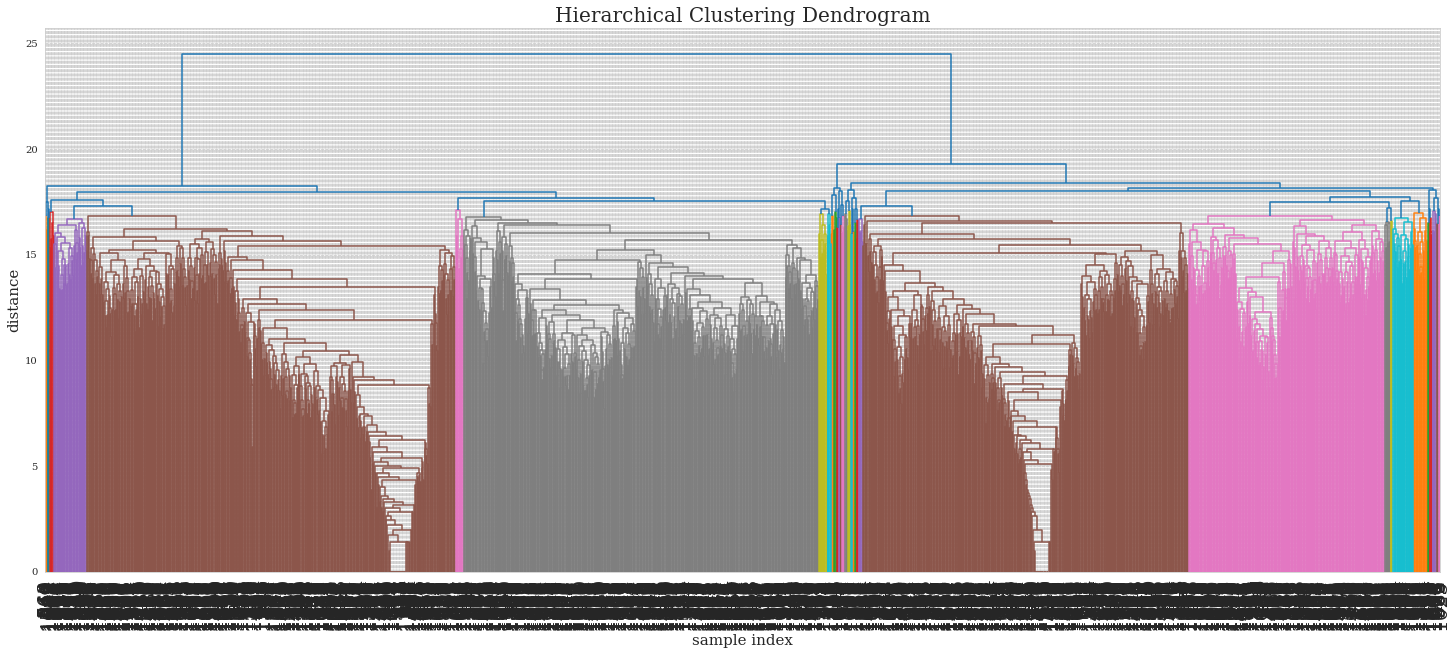

In [257]:

Z = hac.linkage(df_sax, method='complete', metric='euclidean')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=20.,  # font size for the x axis labels
)
plt.show()

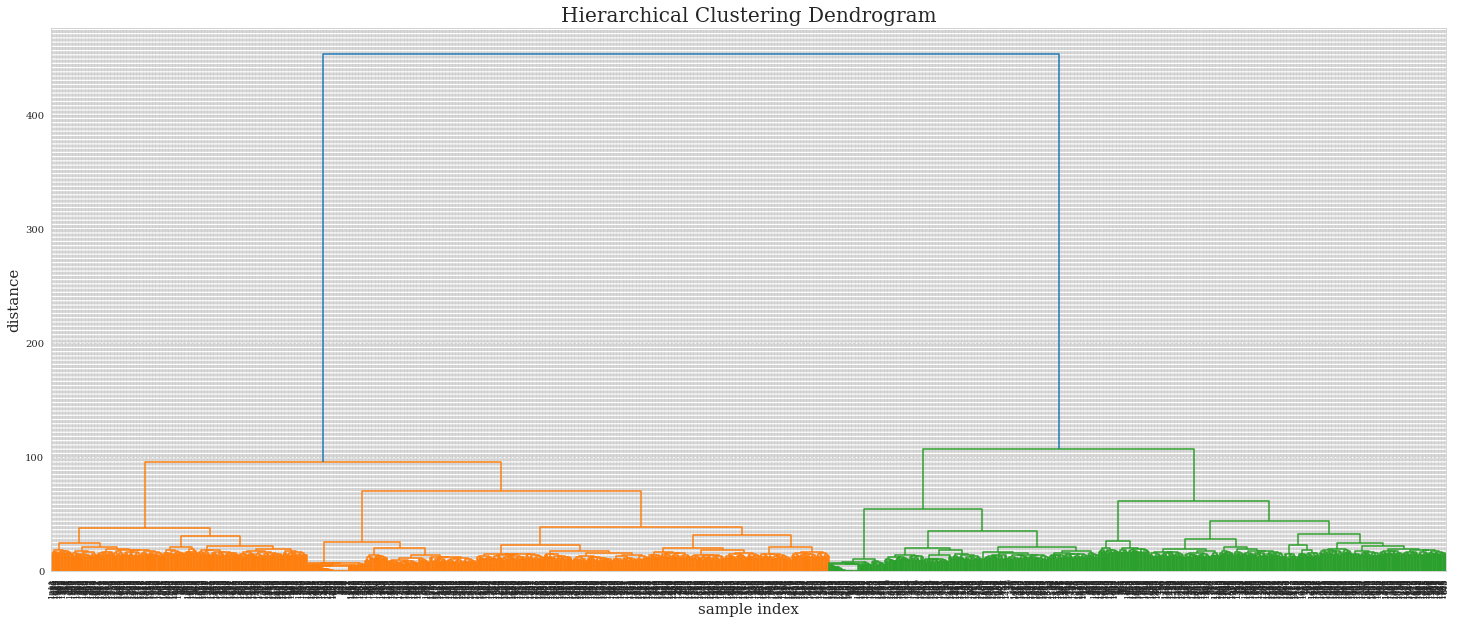

In [275]:

Z = hac.linkage(df_sax, method='ward', metric='euclidean')


plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

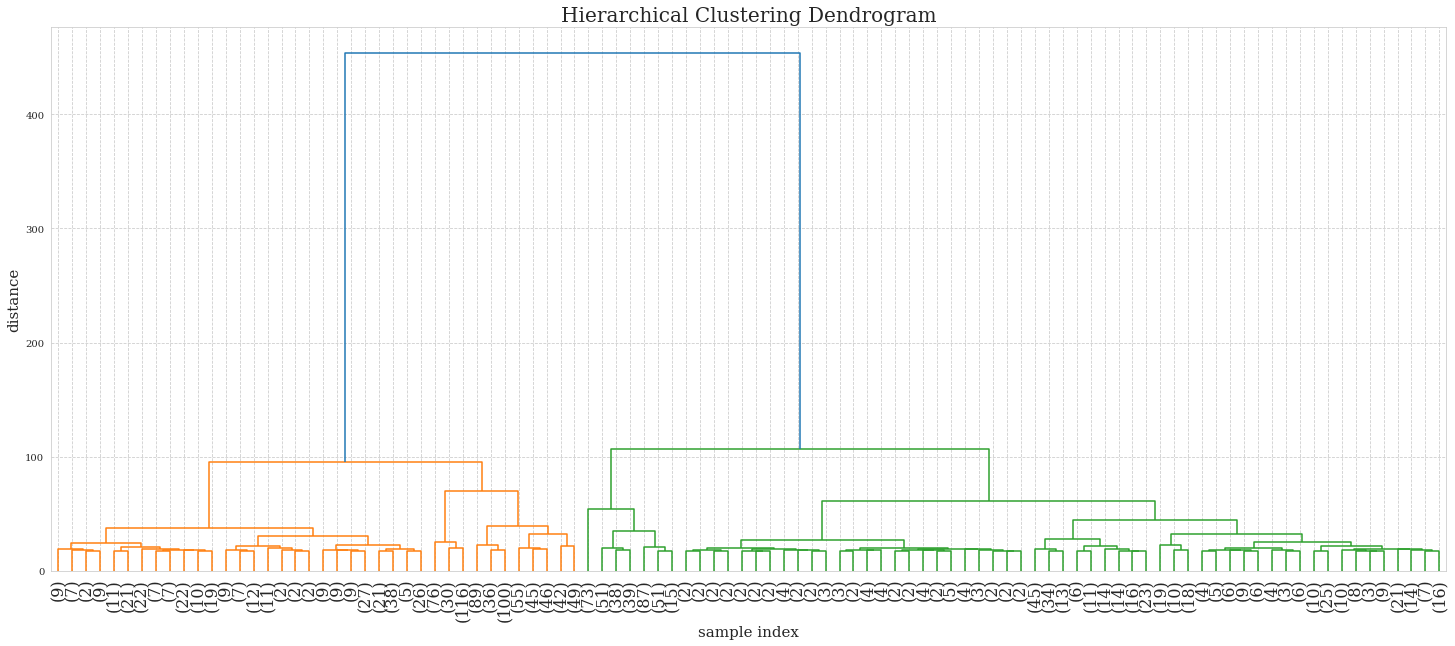

In [285]:
Z = hac.linkage(df_sax, method='ward', metric='euclidean')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # ruota le etichette dell'asse x
    leaf_font_size=16,  # dimensione del font per le etichette dell'asse x
    truncate_mode='lastp',  # limita il numero di livelli da visualizzare
    p=100  # numero massimo di livelli da visualizzare
)
plt.show()

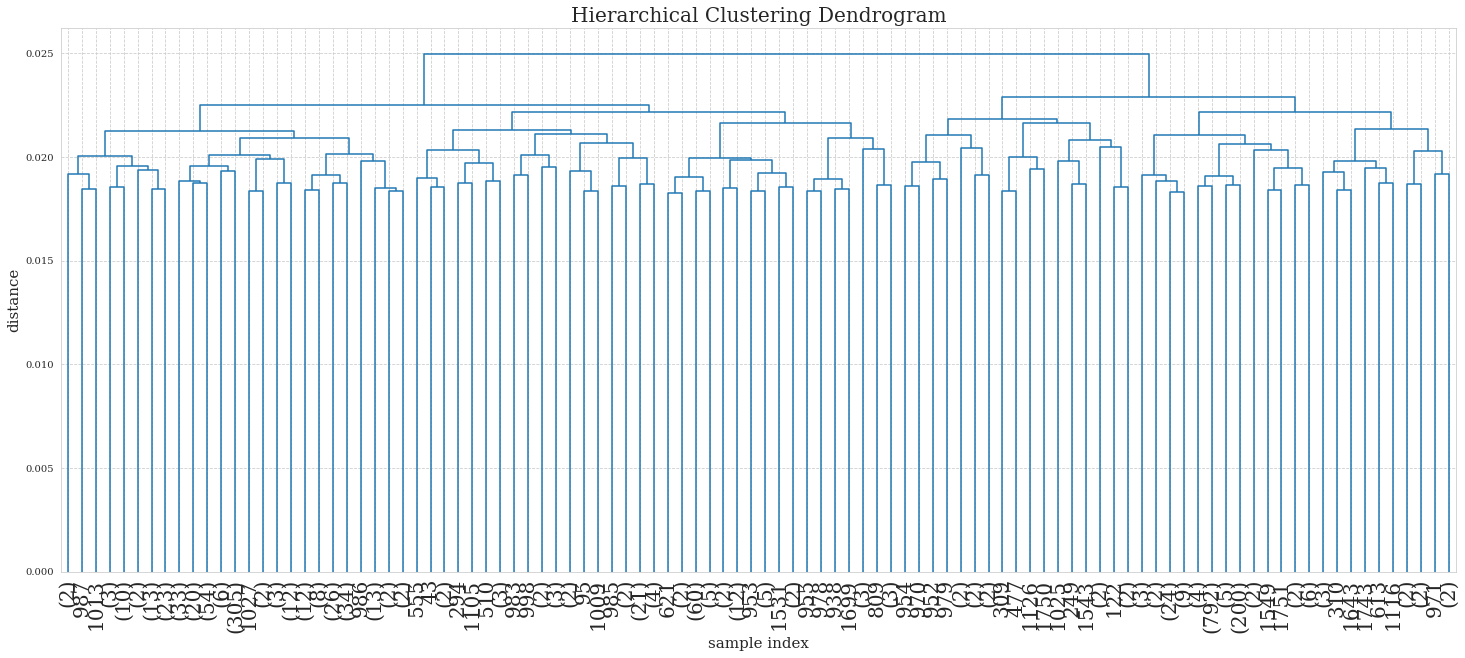

In [237]:
Z = hac.linkage(d2_sax, method='complete', metric='euclidean')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=20.,
    truncate_mode='lastp',  # Limita il numero di livelli da visualizzare
    p=100,  # Numero massimo di livelli da visualizzare
)
plt.show()

In [126]:
import seaborn as sns

In [127]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})
sns.set_context(font_scale=2, rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":15})

KeyError: 600

Tempo di esecuzione: 5087.817979335785 secondi


C:\Users\Utente\AppData\Local\Temp\ipykernel_8308\2889264849.py:21: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  loo = hac.linkage(dist_matrix00, method='complete')


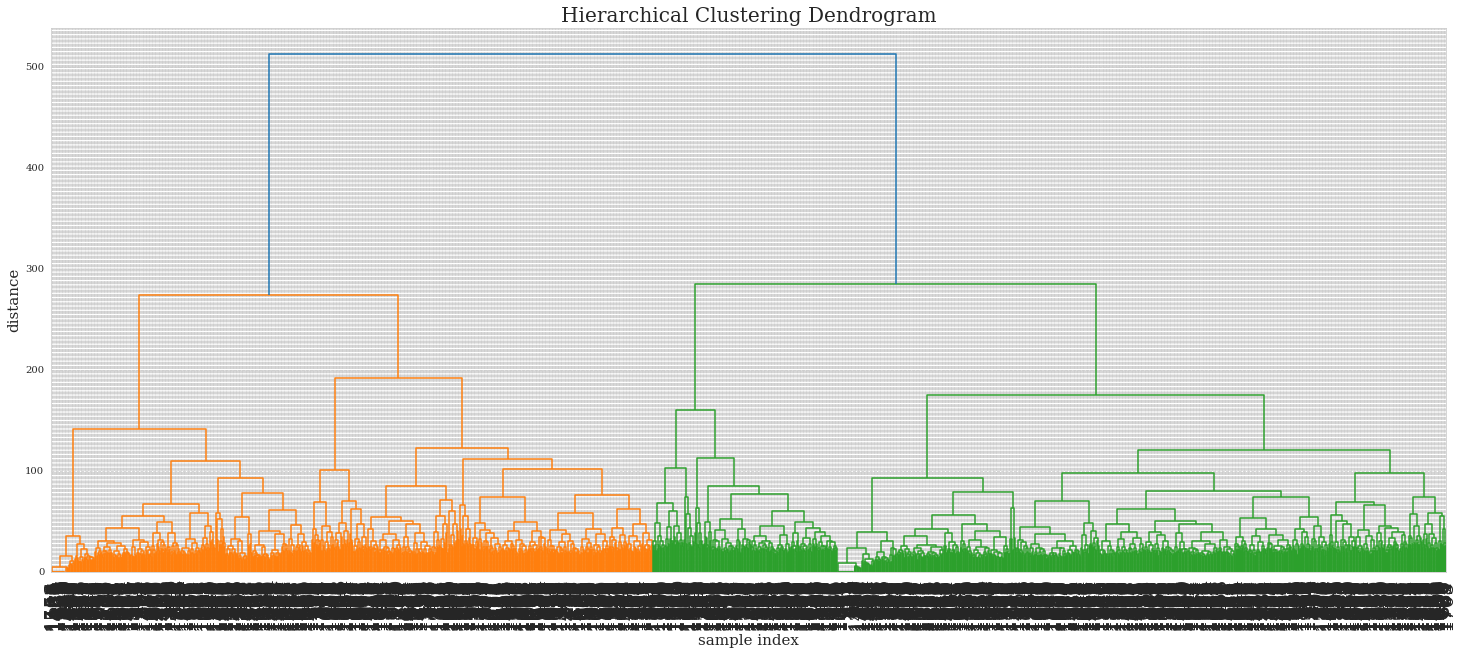

In [311]:
def dtw_distance(series_1, series_2):
    return ts_metrics.dtw(series_1, series_2, global_constraint= "sakoe_chiba") # Sakoe_chiba con massima approssimazione 

dist_matrix00 = np.zeros((len(ts_sax), len(ts_sax))) # Qua creo la matrice con dimensioni uguali al dataset

start_time = time.time()

# Qua faccio un doppio ciclo for per calcolare la distanza DTW tra tutte le coppie di serie temporali.
for i in range(len(ts_sax)):
    for j in range(i+1, len(ts_sax)):
        series_1 = ts_sax[i]
        series_2 = ts_sax[j]
        distance = dtw_distance(series_1, series_2)
#I risultati vengono inseriti nella matrice delle distanze sia nella posizione (i, j) che nella posizione (j, i) 
#la simmetria della matrice
        dist_matrix00[i, j] = distance
        dist_matrix00[j, i] = distance

        
end_time = time.time()
execution_time = end_time - start_time

print(f"Tempo di esecuzione: {execution_time} secondi")

loo = hac.linkage(dist_matrix00, method='complete') #dendrogramma con la matrice di prima e method complete

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(loo, leaf_rotation=90., leaf_font_size=20., trucate_mode = "lastp", p=100)
plt.show()


C:\Users\Utente\AppData\Local\Temp\ipykernel_8308\2725353115.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  loo = hac.linkage(dist_matrix00, method='complete')


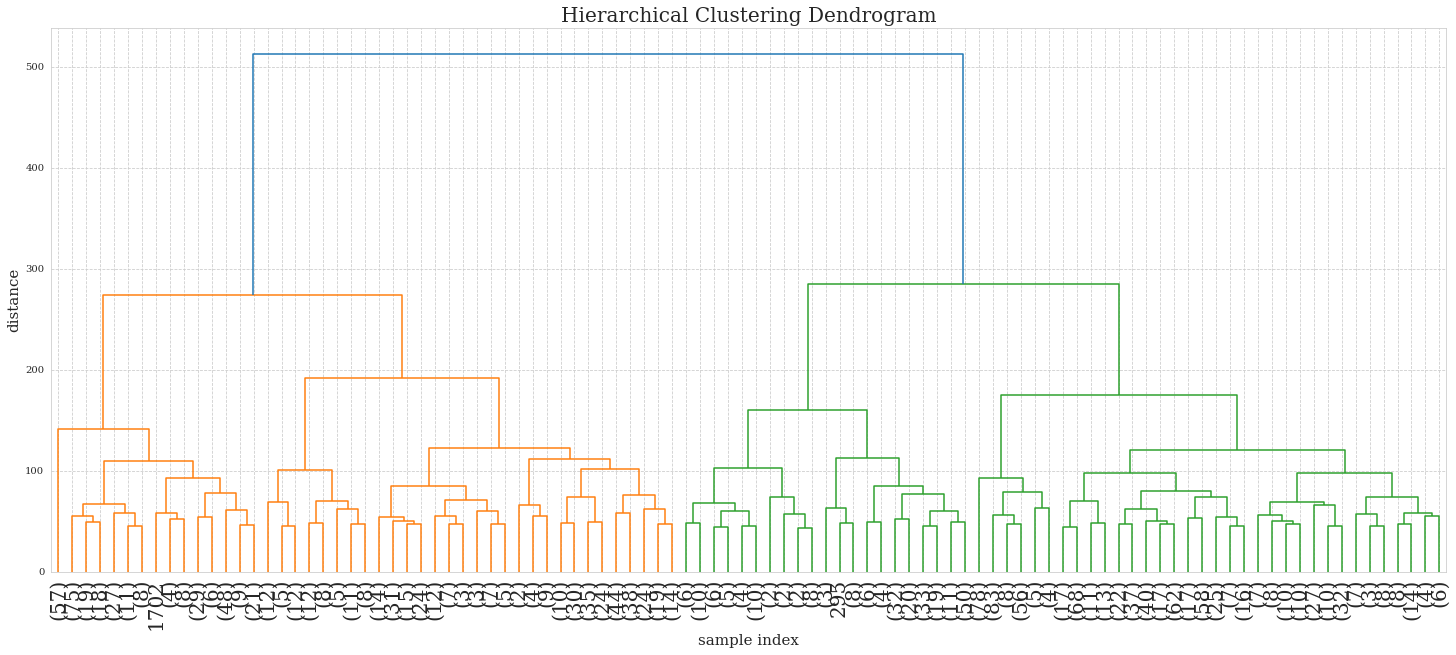

In [313]:
# Stesso grafico di prima, viene solo troncata la visualizzazione e limitato il numero di connessioni a 100 

loo = hac.linkage(dist_matrix00, method='complete')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(loo, leaf_rotation=90., leaf_font_size=20., truncate_mode = "lastp", p=100)
plt.show()

In [181]:
from scipy.cluster.hierarchy import linkage, cut_tree

# Modelli con dimensionality reduction

In [324]:
threshold = 200  # Questa è la distanza scelta per il taglio. Si riferisce ai grafici sopra

labels_loo = hac.fcluster(loo, t=threshold, criterion='distance')

#Controllo il numero di labels
num_labels_loo = len(np.unique(labels_loo))
print("Numero di etichette di cluster:", num_labels_loo)
print(labels_loo)

Numero di etichette di cluster: 4
[1 1 1 ... 4 4 4]


In [325]:

threshold = 200 

labels_Z = hac.fcluster(Z, t=threshold, criterion='distance')

num_labels_Z = len(np.unique(labels_Z))
print("Numero di etichette di cluster:", num_labels_Z)
print(labels_Z)

Numero di etichette di cluster: 2
[2 2 2 ... 1 1 1]


C:\Users\Utente\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


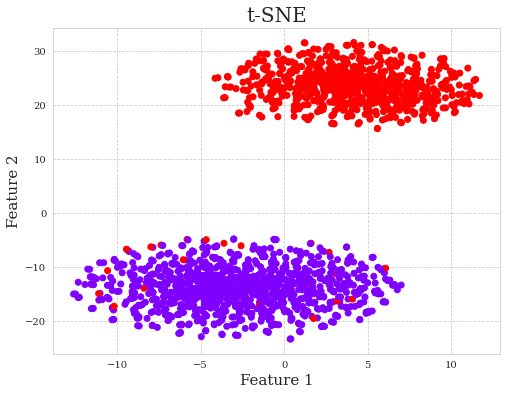

In [333]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

tsne_features = tsne.fit_transform(df_sax)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels_Z, cmap='rainbow')
plt.title('t-SNE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

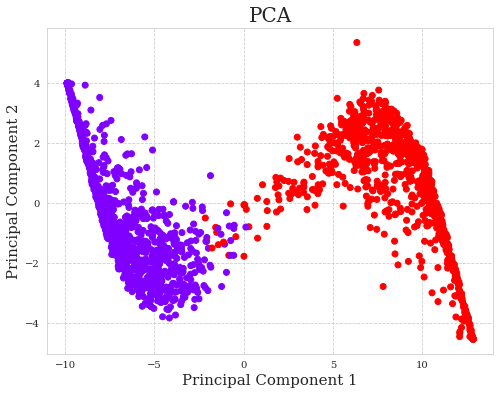

In [332]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_features = pca.fit_transform(df_sax)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_Z, cmap='rainbow')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# DTW plots

C:\Users\Utente\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Utente\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


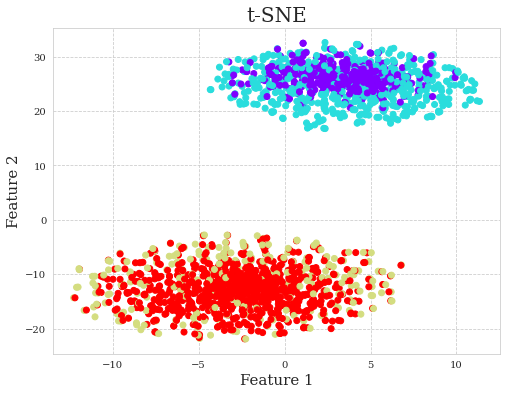

In [334]:

tsne = TSNE(n_components=2)

tsne_features = tsne.fit_transform(ts_sax)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels_loo, cmap='rainbow')
plt.title('t-SNE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

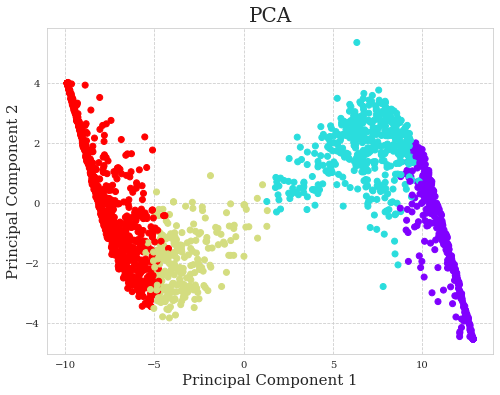

In [335]:

pca = PCA(n_components=2)

pca_features = pca.fit_transform(ts_sax)

plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=labels_loo, cmap='rainbow')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

DUBBIO SE CONVENGA PLOTTARE QUESTI GRAFICI IN 3 DIMENSIONI, SPECIALMENTE PER T-SNE PUO' CREARE CONFUSIONE